<a href="https://colab.research.google.com/github/IR04dy/ML/blob/main/Grid%20search%20Epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier




def create_model():
  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

seed=7
np.random.seed(seed)

dataset = np.loadtxt("/content/pima-indians-diabetes.data.csv", delimiter=",")

X = dataset[:,0:8]
Y = dataset[:,8]

model = KerasClassifier(build_fn=create_model, verbose=0)

batch_size = [10,20,40,60,80,100]
epochs = [10,50,100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-2-2e5f125afb0b>:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.699219 using {'batch_size': 10, 'epochs': 100}
0.621094 (0.041463) with: {'batch_size': 10, 'epochs': 10}
0.673177 (0.016367) with: {'batch_size': 10, 'epochs': 50}
0.699219 (0.019918) with: {'batch_size': 10, 'epochs': 100}
0.604167 (0.019488) with: {'batch_size': 20, 'epochs': 10}
0.684896 (0.006639) with: {'batch_size': 20, 'epochs': 50}
0.678385 (0.009207) with: {'batch_size': 20, 'epochs': 100}
0.475260 (0.070264) with: {'batch_size': 40, 'epochs': 10}
0.658854 (0.018688) with: {'batch_size': 40, 'epochs': 50}
0.652344 (0.017758) with: {'batch_size': 40, 'epochs': 100}
0.523438 (0.028348) with: {'batch_size': 60, 'epochs': 10}
0.656250 (0.028348) with: {'batch_size': 60, 'epochs': 50}
0.666667 (0.008027) with: {'batch_size': 60, 'epochs': 100}
0.537760 (0.100674) with: {'batch_size': 80, 'epochs': 10}
0.619792 (0.036690) with: {'batch_size': 80, 'epochs': 50}
0.648438 (0.033299) with: {'batch_size': 80, 'epochs': 100}
0.592448 (0.073864) with: {'batch_size': 100, 'epochs':

In [ ]:
model.fit(X,Y, batch_size = 20, epochs = 50)

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-5-7b0f05354f25>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(X, Y, train_size=0.8, random_state=42)
validation = val_x,val_y

In [ ]:
history = model.fit(
    X,Y,
    epochs = 100,
    batch_size = 10,
    validation_data = validation
)

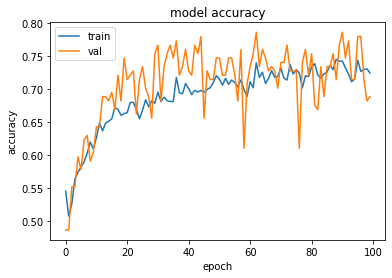

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

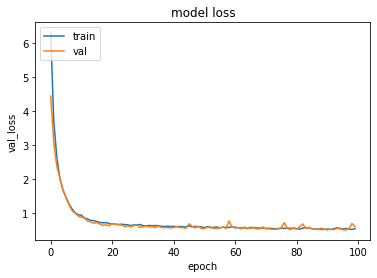

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import pickle

In [ ]:
file_name = 'model'
pickle.dump(model, open(file_name, 'wb'))